# HW 2 Set 1 - Problem 2 (SVM Problem in $R^2$)

Use the dataset titled ”DataSetR2.txt”, which consists of a finite set of points in $\mathbb{R}^2$, each labeled as −1 or 1. Employ the subgradient method to determine a hyperplane that maximizes the margin between the points labeled −1 and those labeled 1. Provide your solution in the form $⟨w, x⟩ + b = 0,$ where $w \in \mathbb{R}^2$ and $b \in \mathbb{R}$. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Maximum number of iterations reached.
Hyperplane equation: ⟨ [ 54.5     104.38994] , x⟩ + 4817.309000009834 = 0


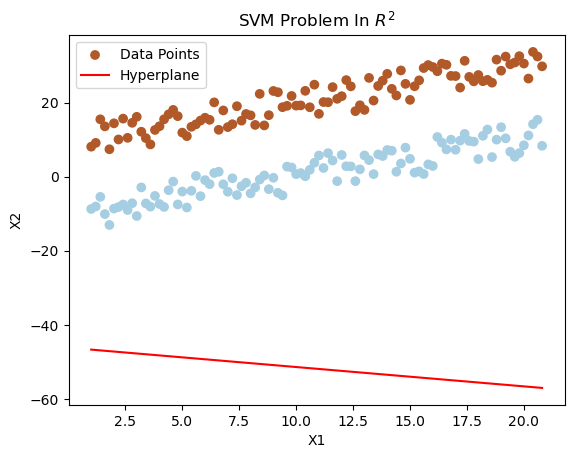

In [63]:
# Load dataset
data = np.loadtxt("DataSetR2.txt")

# Separate features and labels
X = data[:, :-1]       #features are all columns except the last
y = data[:, -1]        #label is in the last column
num_data = X.shape[0]  #number of data points
n = 2                  #number of features considers (data space)      

# Subgradient method
def subgradient_method(X, y, n, num_data, tol, maxiter, alpha, C):
    # Initialize w and b for defining the hyperplane
    iteration = 0 
    w = np.ones(n)
    b = 1
    sgw = np.ones(n)
    sgb = 1
    
    
    def subgradient(w, b, X, y, n, num_data): 
        sgw = np.zeros(n)
        sgb = 0

        for i in range(num_data):
            margin = y[i] * (np.dot(X[i], w) + b)  # Compute margin
            if (margin - 1 > 0):  # Compare margin with 1
                sgw += (-1) * y[i] * X[i]
                sgb += (-1) * y[i]
        
        return sgw, sgb

    
    while iteration < maxiter:
        
        if (np.linalg.norm(sgw) < tol) and (np.linalg.norm(sgb) < tol):
            break 
                                               
        else:
            w -= (alpha * (w + (C/num_data)*(sgw)))      
            b -= (alpha * (C/num_data) * (sgb))
            sgw, sgb = subgradient(w, b, X, y, n, num_data)
            iteration += 1
            if iteration == maxiter:
                print("Maximum number of iterations reached.")
    
    return w, b

# Run subgradient method
w, b = subgradient_method(X, y, n, num_data, tol=10e-10, maxiter=100000, alpha=0.01, C=10)

# Print the hyperplane equation
print("Hyperplane equation: ⟨", w, ",", "x⟩ +", b, "= 0")

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label="Data Points")

# Plot the hyperplane
x_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_plot = (-w[0] * x_plot - b) / w[1]
plt.plot(x_plot, y_plot, '-r', label="Hyperplane")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM Problem In $R^2$")
plt.legend()
plt.show()

# HW 2 Set 1 - Problem 3 (SVM Problem on Subset of Iris Dataset)

Use the dataset titled “irissetonaandversicolor.txt” on Canvas, which includes data on two types of iris flowers labeled as −1 or 1. Allocate 80\% of the dataset for training and reserve the remaining 20\% for testing. Solve the support vector machine (SVM) problem using either the subgradient method or the stochastic subgradient method based on the training data. Then, evaluate the accuracy of your SVM model using the test data.